# Actividad


---
Por: Ángela Córdoba


---




In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import keras
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
# Importar conjunto de datos
# code by Gemini
try:
    df = pd.read_csv('IMDB Dataset SPANISH.csv', on_bad_lines='skip', engine='python')  # Use Python engine for more flexibility
    print(df.head())
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")
    # Let's try to pinpoint the problematic line:
    with open('IMDB Dataset SPANISH.csv', 'r') as file:
        for i, line in enumerate(file):
            if i == 46937:  # Check the line before the reported error
                print("Problematic line (might be the one before):", line)
            if i > 46940:  # Stop after a few lines past the error
                break

   Unnamed: 0                                          review_en  \
0           0  One of the other reviewers has mentioned that ...   
1           1  A wonderful little production. The filming tec...   
2           2  I thought this was a wonderful way to spend ti...   
3           3  Basically there's a family where a little boy ...   
4           4  Petter Mattei's "Love in the Time of Money" is...   

                                           review_es sentiment sentimiento  
0  Uno de los otros críticos ha mencionado que de...  positive    positivo  
1  Una pequeña pequeña producción.La técnica de f...  positive    positivo  
2  Pensé que esta era una manera maravillosa de p...  positive    positivo  
3  Básicamente, hay una familia donde un niño peq...  negative    negativo  
4  El "amor en el tiempo" de Petter Mattei es una...  positive    positivo  


In [3]:
# Descripción del dataset
print(df.describe())

         Unnamed: 0
count  50000.000000
mean   24999.500000
std    14433.901067
min        0.000000
25%    12499.750000
50%    24999.500000
75%    37499.250000
max    49999.000000


In [5]:
# Recuento de valores únicos en la columna 'sentimiento'
# Permite ver cuántas revisiones están etiquetadas como positivas o negativas
print("Total :\n", df['sentimiento'].value_counts())

Total :
 sentimiento
positivo    25000
negativo    25000
Name: count, dtype: int64


Preprocesamiento de las secuencias

In [6]:
# Inicialización de listas
review = []

# Bucle de iteración para almacenar revisiones
sentences = list(df['review_es'])
for sen in sentences:
  review.append(sen)

In [7]:
# Creación de etiquetas
import numpy as np

labels = df['sentimiento']
labels = np.array(list(map(lambda x: 1 if x=="positivo" else 0, labels)))

In [8]:
# División de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

In [9]:
# Parámetros
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type = "post"
oov_tok = "<OOV>"

In [10]:
# Tokenización y acolchado de secuencias
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(train_sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type)

In [11]:
# Construcción del modelo
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.LSTM(16),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
# Compilación del modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo (arquitectura de la red neuronal, número de parámetros, flujo de datos)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 186s 142ms/step - accuracy: 0.5235 - loss: 0.6918 - val_accuracy: 0.5061 - val_loss: 0.6918
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 163s 131ms/step - accuracy: 0.5350 - loss: 0.6878 - val_accuracy: 0.5264 - val_loss: 0.6895
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 204s 132ms/step - accuracy: 0.5271 - loss: 0.6878 - val_accuracy: 0.5263 - val_loss: 0.6899
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 161s 128ms/step - accuracy: 0.5331 - loss: 0.6874 - val_accuracy: 0.5262 - val_loss: 0.6900
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 207s 132ms/step - accuracy: 0.5282 - loss: 0.6880 - val_accuracy: 0.5261 - val_loss: 0.6900
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 201s 132ms/step - accuracy: 0.5323 - loss: 0.6882 - val_accuracy: 0.5260 - val_loss: 0.6901
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 209s 137ms/step - accuracy: 0.5333 - loss: 0.6881 - val_accuracy: 0.5264 - val_loss: 0.6899
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 195s 132ms/step - ac

<Axes: >

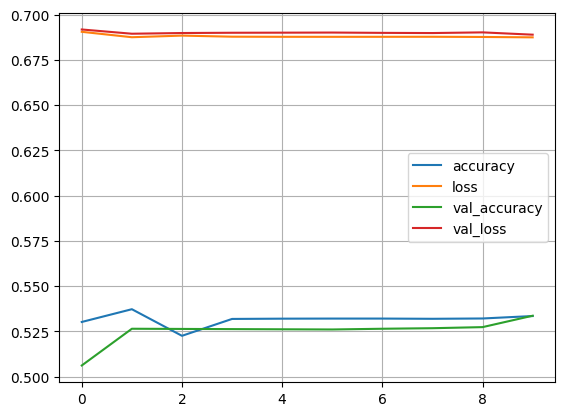

In [13]:
# Entrenamiento del modelo
num_epochs = 10
history = model.fit(padded,
                    train_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, test_labels))

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step
Accuracy: 0.5336
Precision: 0.5669908305715268
Recall: 0.5336
F1 Score: 0.6570588235294117
Matriz de confusión: [[ 868 4118]
 [ 546 4468]]


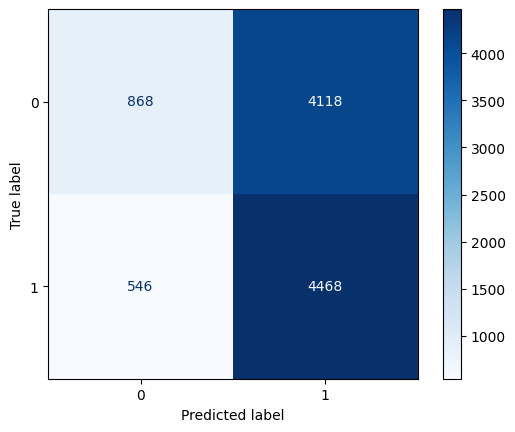

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(testing_padded)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Calcular métricas de evaluación
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
print('Matriz de confusión:', cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step


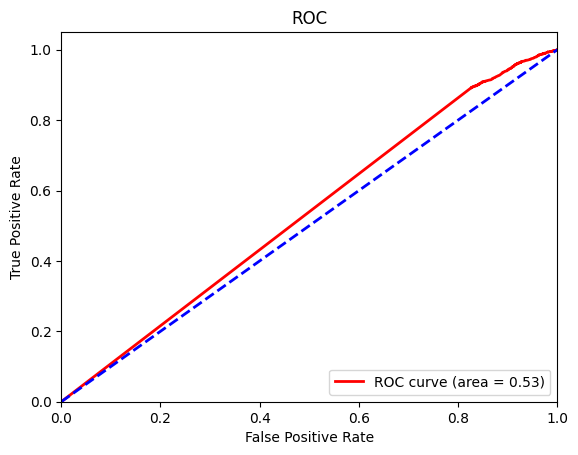

AUC: 0.53


In [15]:
from sklearn.metrics import roc_curve, auc

# Probabilidades de las predicciones
y_prob = model.predict(testing_padded).ravel()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(test_labels, y_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step


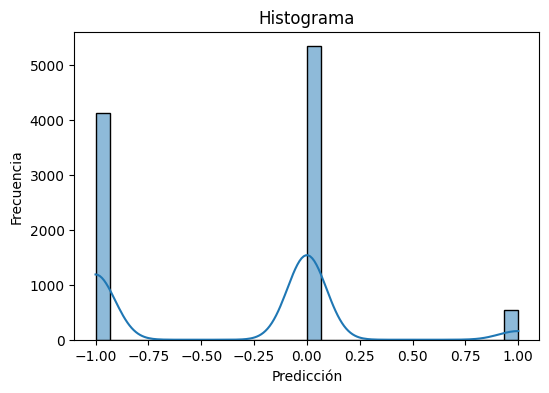

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las predicciones del modelo
y_pred = (model.predict(testing_padded) > 0.5).astype("int32")

# Diferencia entre las etiquetas verdaderas y las predicciones
errors = np.array(test_labels) - np.array(y_pred).flatten()

# Histograma
plt.figure(figsize=(6, 4))
sns.histplot(errors, kde=True, bins=30)
plt.xlabel('Predicción')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()